## <font color='blue'> Step-1: Loading Data into Dataframes </font>

In [1]:
### Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

##setting the max column width
pd.set_option('display.max_columns', 500)


In [2]:
### downloading the data files

# importing necessary modules
import requests, zipfile
from io import BytesIO
print('Downloading started')

#Defining the zip file URL
url = 'https://files.grouplens.org/datasets/movielens/ml-10m.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('./')        

In [3]:
### checking the downloaded the files
import os

# folder path
dir_path = r'./ml-10M100K'

# list file and directories
res = os.listdir(dir_path)
print(res)

['movies.dat', 'split_ratings.sh', 'README.html', 'ratings.dat', 'tags.dat', 'allbut.pl']


In [4]:
### creating dataframes for movies from the .dat files
df_movies = pd.read_table("./ml-10M100K/movies.dat", sep="::", header=None)
df_movies

,0,1,2
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [5]:
### renaming the columns
df_movies.rename(columns={0:"Movie_ID" , 1:"Movie_Name" , 2:"Movie_Genres"},inplace=True)
df_movies

,Movie_ID,Movie_Name,Movie_Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [6]:
### creating dataframes for ratings from the .dat files
df_ratings = pd.read_table("./ml-10M100K/ratings.dat", sep="::", header=None)
df_ratings

,0,1,2,3
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


In [7]:
### renaming the columns
df_ratings.rename(columns={0:"User_ID" , 1:"Movie_ID" , 2:"Rating" , 3:"Timestamp"},inplace=True)
df_ratings

,User_ID,Movie_ID,Rating,Timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


In [8]:
### converting timestamp column into pandas timestamp format
df_ratings["Timestamp"] = pd.to_datetime(df_ratings["Timestamp"], unit='s')
df_ratings

,User_ID,Movie_ID,Rating,Timestamp
0,1,122,5.0,1996-08-02 11:24:06
1,1,185,5.0,1996-08-02 10:58:45
2,1,231,5.0,1996-08-02 10:56:32
3,1,292,5.0,1996-08-02 10:57:01
4,1,316,5.0,1996-08-02 10:56:32
...,...,...,...,...
10000049,71567,2107,1.0,1998-12-02 06:35:53
10000050,71567,2126,2.0,1998-12-03 01:39:03
10000051,71567,2294,5.0,1998-12-02 05:52:48
10000052,71567,2338,2.0,1998-12-02 05:53:36


In [9]:
### creating dataframes for tags from the .dat files
df_tags = pd.read_table("./ml-10M100K/tags.dat", sep="::", header=None)
df_tags

,0,1,2,3
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835
...,...,...,...,...
95575,71556,1377,Gothic,1188263571
95576,71556,2424,chick flick,1188263606
95577,71556,3033,comedy,1188263626
95578,71556,3081,Gothic,1188263565


In [10]:
### renaming the columns
df_tags.rename(columns={0:"User_ID" , 1:"Movie_ID" , 2:"Tag" , 3:"Timestamp"},inplace=True)
df_tags

,User_ID,Movie_ID,Tag,Timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835
...,...,...,...,...
95575,71556,1377,Gothic,1188263571
95576,71556,2424,chick flick,1188263606
95577,71556,3033,comedy,1188263626
95578,71556,3081,Gothic,1188263565


In [11]:
### converting timestamp column into pandas timestamp format
df_tags["Timestamp"] = pd.to_datetime(df_tags["Timestamp"], unit='s')
df_tags

,User_ID,Movie_ID,Tag,Timestamp
0,15,4973,excellent!,2008-07-04 15:17:10
1,20,1747,politics,2007-08-28 01:17:47
2,20,1747,satire,2007-08-28 01:17:47
3,20,2424,chick flick 212,2007-08-28 01:17:15
4,20,2424,hanks,2007-08-28 01:17:15
...,...,...,...,...
95575,71556,1377,Gothic,2007-08-28 01:12:51
95576,71556,2424,chick flick,2007-08-28 01:13:26
95577,71556,3033,comedy,2007-08-28 01:13:46
95578,71556,3081,Gothic,2007-08-28 01:12:45


<br>

<br>

## <font color='blue'> Step-2: EDA </font>

#### Cleaning up the Movies dataframe

In [12]:
df_movies.head()

,Movie_ID,Movie_Name,Movie_Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie_ID      10681 non-null  int64 
 1   Movie_Name    10681 non-null  object
 2   Movie_Genres  10681 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB


In [14]:
### checking null values
df_movies.isnull().sum()

Movie_ID        0
Movie_Name      0
Movie_Genres    0
dtype: int64

In [15]:
### create a new column for the movie yr from movie name
df_movies["Movie_Year"] = df_movies["Movie_Name"].apply(lambda x: int(x[x.rfind('(')+1:x.rfind(')')]))
df_movies.head()

,Movie_ID,Movie_Name,Movie_Genres,Movie_Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [16]:
df_plot_movie_yr = df_movies["Movie_Year"].value_counts(sort=True)

In [201]:
### highest movie released years
df_plot_movie_yr.head(5)

2002    441
2000    405
2001    403
1998    384
1996    384
Name: Movie_Year, dtype: int64

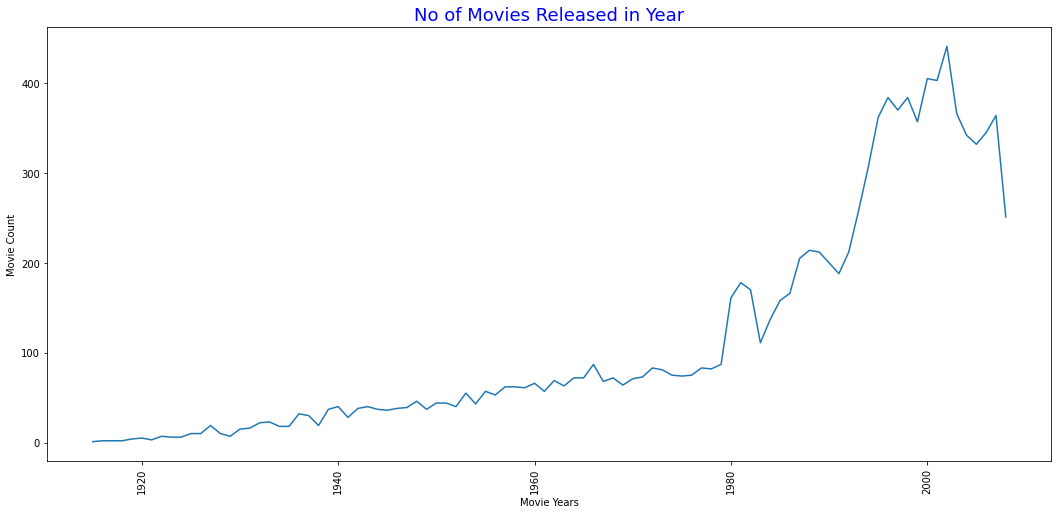

In [17]:
### showing the movie counts year wise
plt.figure(figsize=(18,8))
ax = sns.lineplot(df_plot_movie_yr.index ,df_plot_movie_yr.values)
ax.set(xlabel='Movie Years', ylabel='Movie Count')
plt.title("No of Movies Released in Year" , fontsize=18 , color="blue")
plt.xticks(rotation=90)
plt.show()

In [18]:
### creating a list of distinct genres
Genres_list = []

for movie_genres in df_movies["Movie_Genres"]:
    Genres_list.extend(movie_genres.split('|'))
    
Genres_list = list(set(Genres_list))   
Genres_list

['Horror',
 'Drama',
 'Comedy',
 'IMAX',
 'Film-Noir',
 'Crime',
 'Adventure',
 'Musical',
 'Children',
 'Thriller',
 'Documentary',
 'Sci-Fi',
 'Mystery',
 'Action',
 '(no genres listed)',
 'Romance',
 'Western',
 'War',
 'Fantasy',
 'Animation']

In [202]:
len(Genres_list)

20

In [19]:
### in the movies dataframe we will create the columns accoding to Genres 
### and put 1 or 0 if the movies is in that Genre

df_movies[Genres_list] = 0

for i in df_movies.index:
    genre = df_movies._get_value(i,"Movie_Genres").split('|')
    df_movies.loc[[i],genre] = 1

df_movies.head()        

,Movie_ID,Movie_Name,Movie_Genres,Movie_Year,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
### drop the Movie_Genres column
df_movies.drop(columns="Movie_Genres" , inplace=True)
df_movies.head()

,Movie_ID,Movie_Name,Movie_Year,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation
0,1,Toy Story (1995),1995,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2,Jumanji (1995),1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,Grumpier Old Men (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
### selecing only the movie genere columns
df_plot_movie_genre = df_movies.iloc[:,3:].sum()
df_plot_movie_genre.sort_values(inplace=True, ascending=False)

In [22]:
df_plot_movie_genre

Drama                 5339
Comedy                3703
Thriller              1706
Romance               1685
Action                1473
Crime                 1118
Adventure             1025
Horror                1013
Sci-Fi                 754
Fantasy                543
Children               528
War                    511
Mystery                509
Documentary            482
Musical                436
Animation              286
Western                275
Film-Noir              148
IMAX                    29
(no genres listed)       1
dtype: int64

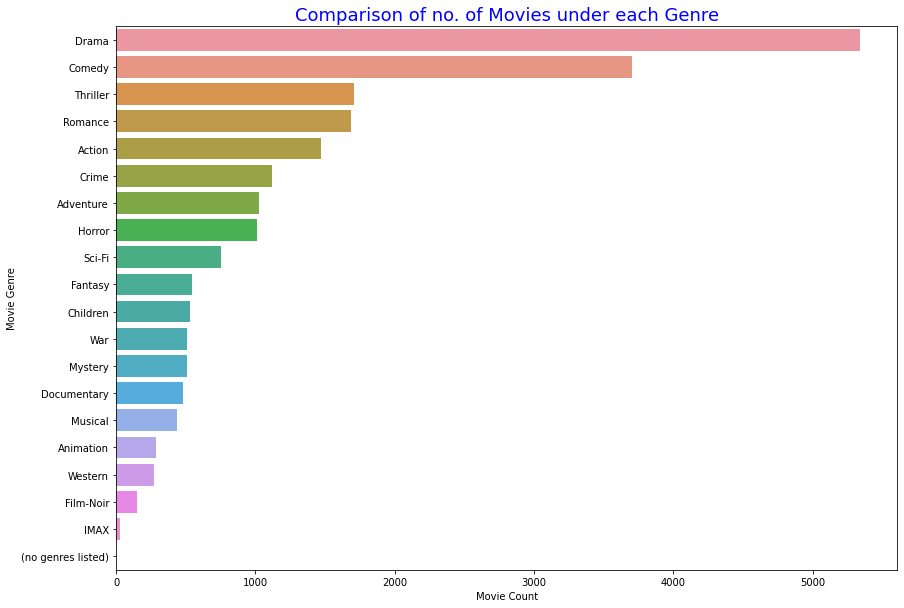

In [23]:
### checking the count of movies under each Genre
plt.figure(figsize=(14,10))
ax=sns.barplot(y=df_plot_movie_genre.index , x=df_plot_movie_genre.values)
ax.set(xlabel='Movie Count', ylabel='Movie Genre')
plt.title("Comparison of no. of Movies under each Genre" , fontsize=18 , color="blue")
plt.show()

In [24]:
df_tags.head()

,User_ID,Movie_ID,Tag,Timestamp
0,15,4973,excellent!,2008-07-04 15:17:10
1,20,1747,politics,2007-08-28 01:17:47
2,20,1747,satire,2007-08-28 01:17:47
3,20,2424,chick flick 212,2007-08-28 01:17:15
4,20,2424,hanks,2007-08-28 01:17:15


In [25]:
df_tags["Tag"].value_counts(ascending=False)

Tumey's DVDs             641
classic                  621
based on a book          549
R                        518
less than 300 ratings    505
                        ... 
skinny dipping             1
cillian murphy             1
movie about a movie        1
disturbing images          1
Elaine Hendrix             1
Name: Tag, Length: 16528, dtype: int64

In [26]:
### checking null values
df_tags.isnull().sum()

User_ID       0
Movie_ID      0
Tag          16
Timestamp     0
dtype: int64

In [27]:
### checking datatype of ratings column
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000054 entries, 0 to 10000053
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   User_ID    int64         
 1   Movie_ID   int64         
 2   Rating     float64       
 3   Timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 305.2 MB


In [28]:
### checking null values
df_ratings.isnull().sum()

User_ID      0
Movie_ID     0
Rating       0
Timestamp    0
dtype: int64

In [29]:
### extracting the avg movie rating for each movie by the users
df_rating_avg = df_ratings.groupby(by="Movie_ID")["Rating"].mean()
df_rating_avg

Movie_ID
1        3.928769
2        3.208070
3        3.150385
4        2.860544
5        3.077435
           ...   
65088    3.062500
65091    3.666667
65126    3.666667
65130    2.250000
65133    3.357143
Name: Rating, Length: 10677, dtype: float64

In [30]:
### extracting the number of ratings per movie
df_rating_count = df_ratings.groupby(by="Movie_ID")["Rating"].count()
df_rating_count

Movie_ID
1        26449
2        12032
3         7790
4         1764
5         7135
         ...  
65088        8
65091        3
65126        3
65130        2
65133        7
Name: Rating, Length: 10677, dtype: int64

In [31]:
### adding the avg rating & number of ratings column with the movies dataframe
df_movies = pd.merge(df_movies,df_rating_avg, on="Movie_ID")
df_movies.rename(columns={"Rating" : "Avg_Rating" , },inplace=True)
df_movies = pd.merge(df_movies,df_rating_count, on="Movie_ID")
df_movies.rename(columns={"Rating" : "Number_of_Rating" , },inplace=True)
df_movies.head()

,Movie_ID,Movie_Name,Movie_Year,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation,Avg_Rating,Number_of_Rating
0,1,Toy Story (1995),1995,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,3.928769,26449
1,2,Jumanji (1995),1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,3.208070,12032
2,3,Grumpier Old Men (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.150385,7790
3,4,Waiting to Exhale (1995),1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.860544,1764
4,5,Father of the Bride Part II (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.077435,7135


In [32]:
### rounding up the avg rating column
df_movies["Avg_Rating"] = round(df_movies["Avg_Rating"],2)
df_movies.head()

,Movie_ID,Movie_Name,Movie_Year,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation,Avg_Rating,Number_of_Rating
0,1,Toy Story (1995),1995,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,3.93,26449
1,2,Jumanji (1995),1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,3.21,12032
2,3,Grumpier Old Men (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.15,7790
3,4,Waiting to Exhale (1995),1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2.86,1764
4,5,Father of the Bride Part II (1995),1995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.08,7135


In [33]:
### displaying top 100 rated movies where at least 20 users have given the rating
df_movies_top100 = df_movies[df_movies["Number_of_Rating"] > 20].sort_values(by="Avg_Rating" , ascending=False).head(100)
df_movies_top100

,Movie_ID,Movie_Name,Movie_Year,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation,Avg_Rating,Number_of_Rating
315,318,"Shawshank Redemption, The (1994)",1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.46,31126
843,858,"Godfather, The (1972)",1972,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,19814
49,50,"Usual Suspects, The (1995)",1995,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4.37,24037
523,527,Schindler's List (1993),1993,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.36,25777
3348,3435,Double Indemnity (1944),1944,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.32,2403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,4993,"Lord of the Rings: The Fellowship of the Ring,...",2001,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,4.16,15938
886,903,Vertigo (1958),1958,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,4.16,7491
4914,5008,Witness for the Prosecution (1957),1957,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4.16,687
1855,1939,"Best Years of Our Lives, The (1946)",1946,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.15,1010


In [207]:
### top 5 movies based on user ratings
df_movies_top100[["Movie_ID","Movie_Name","Avg_Rating","Number_of_Rating"]].head(5)

,Movie_ID,Movie_Name,Avg_Rating,Number_of_Rating
315,318,"Shawshank Redemption, The (1994)",4.46,31126
843,858,"Godfather, The (1972)",4.42,19814
49,50,"Usual Suspects, The (1995)",4.37,24037
523,527,Schindler's List (1993),4.36,25777
3348,3435,Double Indemnity (1944),4.32,2403


In [34]:
### Checking the movie genre of top 100 movies
df_plot_movietop100_genre = df_movies_top100.iloc[:,3:-2].sum()
df_plot_movietop100_genre.sort_values(inplace=True, ascending=False)
df_plot_movietop100_genre

Drama                 56
Comedy                28
Crime                 23
Thriller              19
Romance               18
Action                15
War                   14
Adventure             13
Mystery               13
Film-Noir             12
Animation              6
Fantasy                5
Children               4
Sci-Fi                 4
Documentary            3
Western                1
Musical                1
IMAX                   1
Horror                 1
(no genres listed)     0
dtype: int64

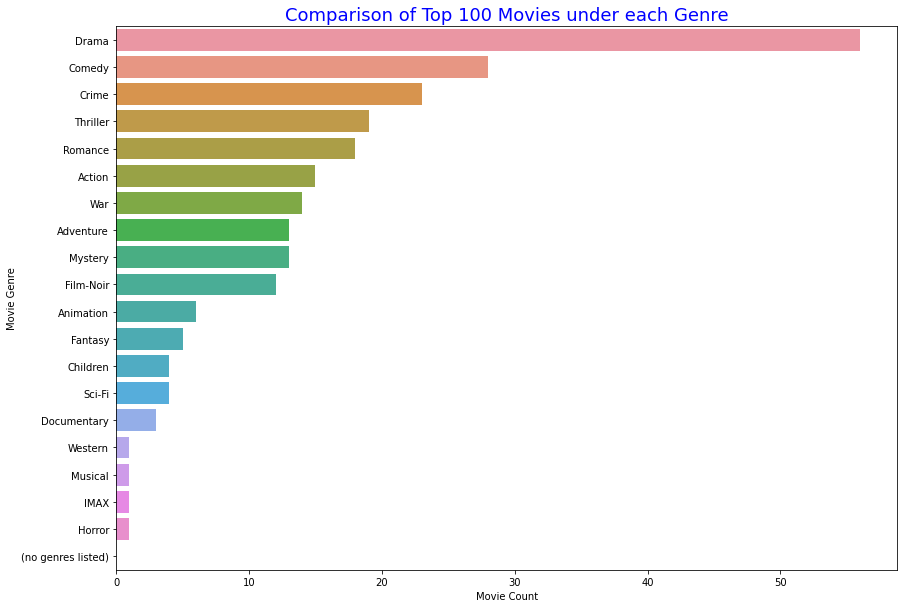

In [35]:
### displaying the movie genre of top 100 movies
plt.figure(figsize=(14,10))
ax=sns.barplot(y=df_plot_movietop100_genre.index , x=df_plot_movietop100_genre.values)
ax.set(xlabel='Movie Count', ylabel='Movie Genre')
plt.title("Comparison of Top 100 Movies under each Genre" , fontsize=18 , color="blue")
plt.show()

In [36]:
### converting rating timestamp column into month and yr
df_ratings.head(5)

,User_ID,Movie_ID,Rating,Timestamp
0,1,122,5.0,1996-08-02 11:24:06
1,1,185,5.0,1996-08-02 10:58:45
2,1,231,5.0,1996-08-02 10:56:32
3,1,292,5.0,1996-08-02 10:57:01
4,1,316,5.0,1996-08-02 10:56:32


In [37]:
## adding rating year
df_ratings["Rating_Year"] = df_ratings.Timestamp.dt.year

In [38]:
## adding rating month
df_ratings["Rating_Month"] = df_ratings.Timestamp.dt.month_name()

In [39]:
## adding rating day
df_ratings["Rating_Day"] = df_ratings.Timestamp.dt.day_name()

In [40]:
df_ratings.head(5)

,User_ID,Movie_ID,Rating,Timestamp,Rating_Year,Rating_Month,Rating_Day
0,1,122,5.0,1996-08-02 11:24:06,1996,August,Friday
1,1,185,5.0,1996-08-02 10:58:45,1996,August,Friday
2,1,231,5.0,1996-08-02 10:56:32,1996,August,Friday
3,1,292,5.0,1996-08-02 10:57:01,1996,August,Friday
4,1,316,5.0,1996-08-02 10:56:32,1996,August,Friday


In [41]:
### checking the businest day of the week for user to watch movies
df_plot_rating_day = df_ratings["Rating_Day"].value_counts(sort=True)

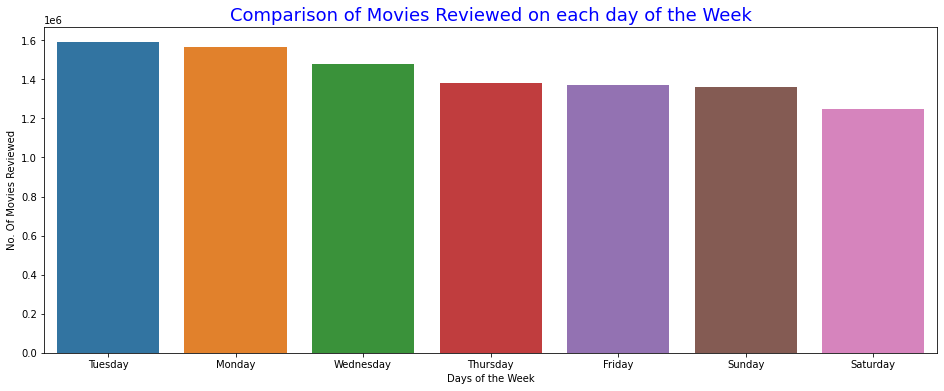

In [42]:
### displaying the bussiest day of the week to watch movies
plt.figure(figsize=(16,6))
ax=sns.barplot(x=df_plot_rating_day.index , y=df_plot_rating_day.values)
ax.set(xlabel='Days of the Week', ylabel='No. Of Movies Reviewed')
plt.title("Comparison of Movies Reviewed on each day of the Week" , fontsize=18 , color="blue")
plt.show()

In [43]:
### checking the businest month for user to watch movies
df_plot_rating_month = df_ratings["Rating_Month"].value_counts(sort=True)


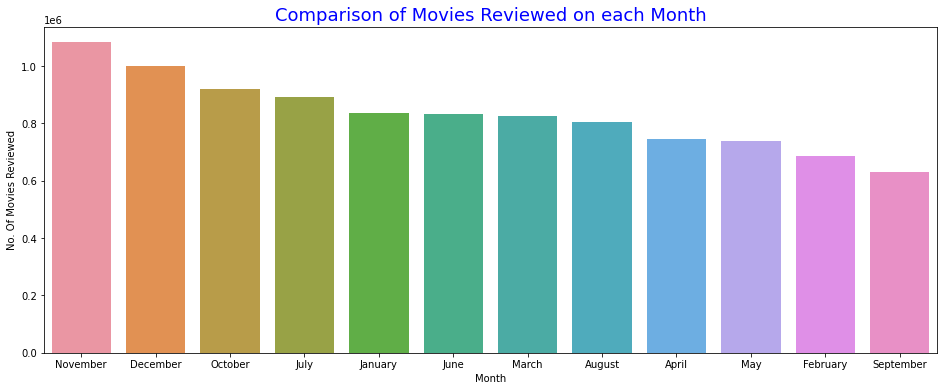

In [44]:
### displaying the bussiest month of the week to watch movies
plt.figure(figsize=(16,6))
ax=sns.barplot(x=df_plot_rating_month.index , y=df_plot_rating_month.values)
ax.set(xlabel='Month', ylabel='No. Of Movies Reviewed')
plt.title("Comparison of Movies Reviewed on each Month" , fontsize=18 , color="blue")
plt.show()

In [45]:
### checking the busiest year for user to watch movies
df_plot_rating_year = df_ratings["Rating_Year"].value_counts(sort=True)

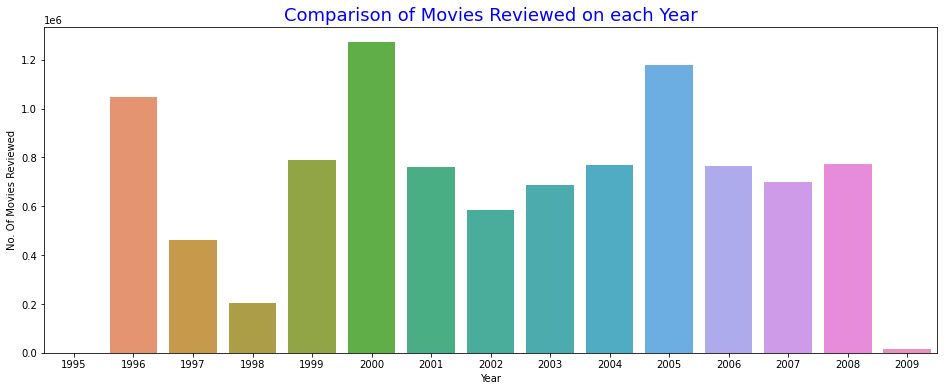

In [46]:
### displaying the busiest years to watch movies
plt.figure(figsize=(16,6))
ax=sns.barplot(x=df_plot_rating_year.index , y=df_plot_rating_year.values)
ax.set(xlabel='Year', ylabel='No. Of Movies Reviewed')
plt.title("Comparison of Movies Reviewed on each Year" , fontsize=18 , color="blue")
plt.show()

In [47]:
### checking the correlation between the top 20 movies based on Genre & Avg rating
df_top_movie_corr = df_movies_top100.head(20)
df_top_movie_corr.drop(columns=["Movie_ID","Movie_Year","Number_of_Rating"], inplace=True)
df_top_movie_corr.set_index("Movie_Name", inplace=True)
df_top_movie_corr.head()

,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation,Avg_Rating
Movie_Name,,,,,,,,,,,,,,,,,,,,,
"Shawshank Redemption, The (1994)",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.46
"Godfather, The (1972)",0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42
"Usual Suspects, The (1995)",0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4.37
Schindler's List (1993),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.36
Double Indemnity (1944),0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.32


In [48]:
### creating the transpose matrrix to generate the movie corelation.
df_top_movie_corr = df_top_movie_corr.transpose()
df_top_movie_corr = df_top_movie_corr.corr()
df_top_movie_corr

Movie_Name,"Shawshank Redemption, The (1994)","Godfather, The (1972)","Usual Suspects, The (1995)",Schindler's List (1993),Double Indemnity (1944),Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Casablanca (1942),Rear Window (1954),Paths of Glory (1957),Seven Samurai (Shichinin no samurai) (1954),"Third Man, The (1949)","Godfather: Part II, The (1974)",Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),"Lives of Others, The (Das Leben der Anderen) (2006)","Dark Knight, The (2008)",One Flew Over the Cuckoo's Nest (1975),Shoah (1985),Wallace & Gromit: The Wrong Trousers (1993),Yojimbo (1961),"Big Sleep, The (1946)"
Movie_Name,,,,,,,,,,,,,,,,,,,,
"Shawshank Redemption, The (1994)",1.000000,0.975475,0.901639,0.974854,0.951967,0.951967,0.974421,0.922101,0.974311,0.974311,0.899821,0.974200,0.921654,0.999967,0.931454,0.974087,0.921201,0.879257,0.913755,0.898571
"Godfather, The (1972)",0.975475,1.000000,0.924279,0.948251,0.974958,0.923254,0.947792,0.895607,0.947675,0.947675,0.871233,0.999966,0.895148,0.975387,0.952255,0.947438,0.894683,0.900286,0.932238,0.922192
"Usual Suspects, The (1995)",0.901639,0.924279,1.000000,0.871755,0.896416,0.844629,0.870826,0.975364,0.870590,0.870590,0.948093,0.922847,0.870352,0.899667,0.871526,0.870114,0.869873,0.871219,0.901018,0.947636
Schindler's List (1993),0.974854,0.948251,0.871755,1.000000,0.922562,0.922562,0.947145,0.894295,0.999994,0.947030,0.869881,0.946913,0.946913,0.974789,0.899843,0.946796,0.946677,0.847108,0.879894,0.868593
Double Indemnity (1944),0.951967,0.974958,0.896416,0.922562,1.000000,0.947674,0.922081,0.869268,0.921959,0.921959,0.895129,0.974875,0.868795,0.951846,0.922701,0.921711,0.868316,0.870097,0.900373,0.947116
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),0.951967,0.923254,0.844629,0.922562,0.947674,1.000000,0.974894,0.869268,0.921959,0.921959,0.895129,0.921835,0.868795,0.951846,0.870403,0.921711,0.868316,0.817693,0.848192,0.894241
Casablanca (1942),0.974421,0.947792,0.870826,0.947145,0.922081,0.974894,1.000000,0.893392,0.946582,0.946582,0.868951,0.946466,0.892933,0.974373,0.899333,0.946349,0.892467,0.846150,0.879352,0.867664
Rear Window (1954),0.922101,0.895607,0.975364,0.894295,0.869268,0.869268,0.893392,1.000000,0.893163,0.893163,0.974797,0.892933,0.892933,0.920183,0.846549,0.892701,0.892467,0.846150,0.879352,0.921030
Paths of Glory (1957),0.974311,0.947675,0.870590,0.999994,0.921959,0.921959,0.946582,0.893163,1.000000,0.946467,0.868715,0.946352,0.946352,0.974266,0.899203,0.946235,0.946118,0.845907,0.879214,0.867428


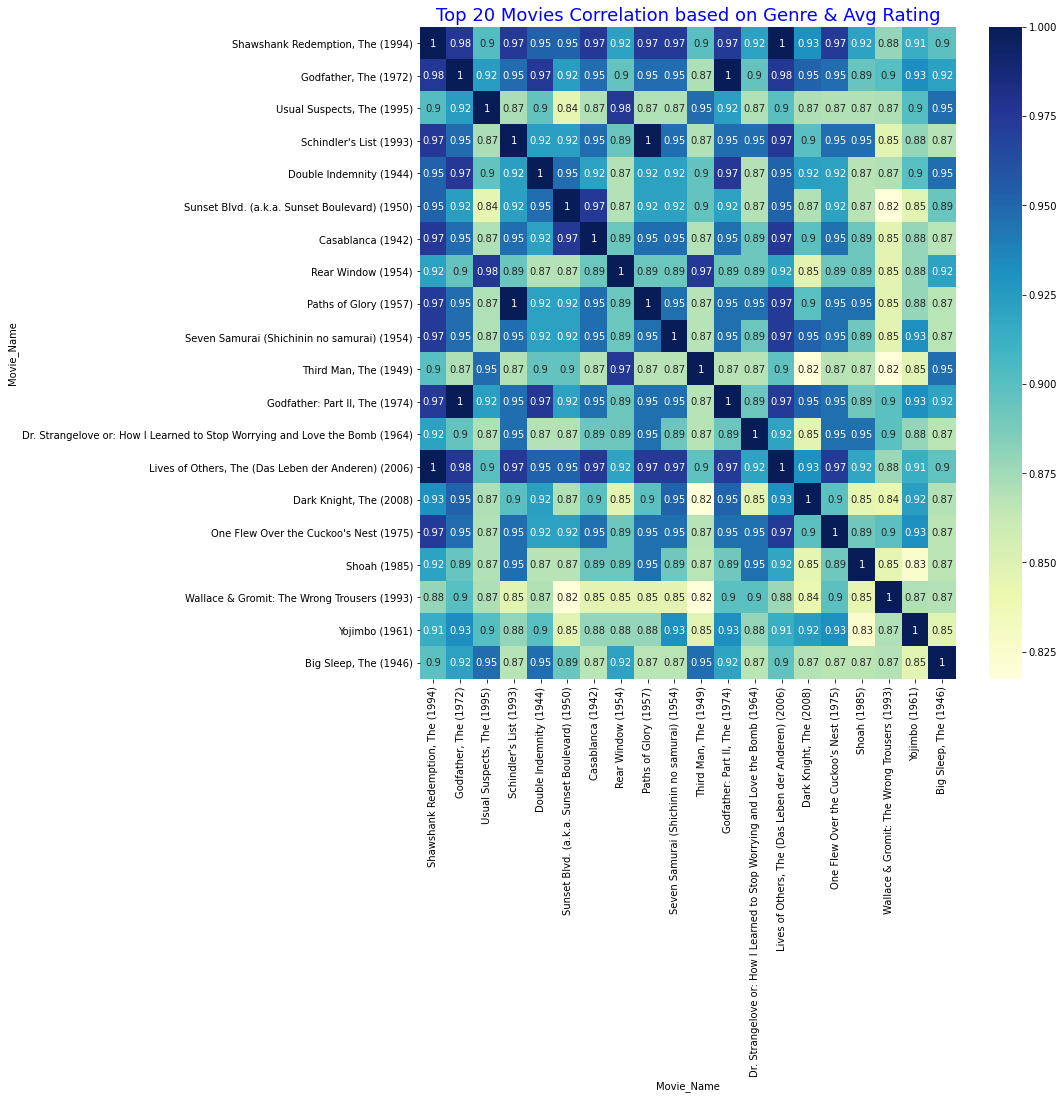

In [49]:
### checking the corraltion of movies in Heatmap
plt.figure(figsize=(12,12))
ax=sns.heatmap(df_top_movie_corr , annot=True , cmap="YlGnBu")
plt.title("Top 20 Movies Correlation based on Genre & Avg Rating" , fontsize=18 , color="blue")
plt.show()

In [50]:
### let manually check few of the highly correlated movies
df_movies_top100[df_movies_top100["Movie_Name"].str.contains("Lives of Others") 
                 | df_movies_top100["Movie_Name"].str.contains("Shawshank Redemption")
                | df_movies_top100["Movie_Name"].str.contains("Godfather")
                | df_movies_top100["Movie_Name"].str.contains("Schindler's List ")]

,Movie_ID,Movie_Name,Movie_Year,Horror,Drama,Comedy,IMAX,Film-Noir,Crime,Adventure,Musical,Children,Thriller,Documentary,Sci-Fi,Mystery,Action,(no genres listed),Romance,Western,War,Fantasy,Animation,Avg_Rating,Number_of_Rating
315,318,"Shawshank Redemption, The (1994)",1994,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.46,31126
843,858,"Godfather, The (1972)",1972,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,19814
523,527,Schindler's List (1993),1993,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4.36,25777
1195,1221,"Godfather: Part II, The (1974)",1974,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30,13281
9467,44555,"Lives of Others, The (Das Leben der Anderen) (...",2006,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30,1230


In [51]:
df_ratings.sort_values(by=["User_ID","Timestamp"])

,User_ID,Movie_ID,Rating,Timestamp,Rating_Year,Rating_Month,Rating_Day
18,1,588,5.0,1996-08-02 10:55:39,1996,August,Friday
2,1,231,5.0,1996-08-02 10:56:32,1996,August,Friday
4,1,316,5.0,1996-08-02 10:56:32,1996,August,Friday
5,1,329,5.0,1996-08-02 10:56:32,1996,August,Friday
3,1,292,5.0,1996-08-02 10:57:01,1996,August,Friday
...,...,...,...,...,...,...,...
10000037,71567,1833,3.0,1998-12-03 01:39:31,1998,December,Thursday
10000005,71567,260,5.0,1998-12-03 01:41:11,1998,December,Thursday
10000032,71567,1721,4.0,1998-12-03 01:41:11,1998,December,Thursday
10000014,71567,898,4.0,1998-12-03 01:43:23,1998,December,Thursday


In [52]:
### number of disticnt users & Movies in Rating table
print("Unique Users : ", df_ratings["User_ID"].nunique())
print("\nUnique Movies : ", df_ratings["Movie_ID"].nunique())

Unique Users :  69878

Unique Movies :  10677


In [79]:
### lets create pivot table to see top 20 highest rated users based on rating for movies
df_top_rated_users = df_ratings.groupby(by="User_ID")["Rating"].count() 
df_top_rated_users = df_top_rated_users.sort_values(ascending=False).head(20)
df_top_rated_users

User_ID
59269    7359
67385    7047
14463    5169
68259    4483
27468    4449
3817     4165
19635    4165
63134    3755
58357    3697
27584    3479
6757     3414
56707    3225
19379    3202
7795     3187
8811     3164
30723    3027
30687    2909
31327    2886
30500    2827
47046    2812
Name: Rating, dtype: int64

In [80]:
df_ratings_pivot = df_ratings[(df_ratings["User_ID"].isin(list(df_top_rated_users.index)))
           & df_ratings["Movie_ID"].isin(list(df_movies_top100["Movie_ID"].head(20)))]

In [81]:
### lets create pivot table to see user rating for movies
df_ratings_pivot = pd.pivot_table(df_ratings_pivot, values="Rating" , index="User_ID" , columns="Movie_ID")
df_ratings_pivot

Movie_ID,50,318,527,750,858,904,912,922,1148,1178,1193,1212,1221,1284,2019,3030,3435,6896,44555,58559
User_ID,,,,,,,,,,,,,,,,,,,,
3817,4.0,4.0,4.0,3.5,3.5,3.5,3.0,3.0,4.5,3.5,3.5,3.5,3.5,NaN,3.5,3.5,3.0,NaN,NaN,4.0
6757,4.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,3.0,4.0,4.0,4.5,4.5,4.5,3.5,2.0,5.0,NaN,4.0,3.5
7795,5.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,NaN,NaN
8811,4.5,3.0,4.5,4.0,5.0,4.0,4.0,NaN,NaN,4.0,5.0,4.0,4.5,4.0,4.0,NaN,4.0,NaN,NaN,3.0
14463,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,NaN,NaN,NaN
19379,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,NaN,4.5,5.0
19635,4.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.5,5.0,4.0,5.0,3.0,4.0,NaN,5.0,NaN,NaN,NaN
27468,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,NaN,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.5
27584,3.5,3.5,4.0,3.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,3.5,5.0,2.0,NaN,NaN,3.5,NaN,5.0,2.5


In [83]:
### lets put 0 for all movies the users have not seen yet.
df_ratings_pivot.fillna(0 , inplace=True)
df_ratings_pivot

Movie_ID,50,318,527,750,858,904,912,922,1148,1178,1193,1212,1221,1284,2019,3030,3435,6896,44555,58559
User_ID,,,,,,,,,,,,,,,,,,,,
3817,4.0,4.0,4.0,3.5,3.5,3.5,3.0,3.0,4.5,3.5,3.5,3.5,3.5,0.0,3.5,3.5,3.0,0.0,0.0,4.0
6757,4.0,4.0,4.0,4.0,5.0,3.0,5.0,4.0,3.0,4.0,4.0,4.5,4.5,4.5,3.5,2.0,5.0,0.0,4.0,3.5
7795,5.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0
8811,4.5,3.0,4.5,4.0,5.0,4.0,4.0,0.0,0.0,4.0,5.0,4.0,4.5,4.0,4.0,0.0,4.0,0.0,0.0,3.0
14463,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,0.0,0.0,0.0
19379,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,0.0,4.5,5.0
19635,4.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.5,5.0,4.0,5.0,3.0,4.0,0.0,5.0,0.0,0.0,0.0
27468,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,0.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.5
27584,3.5,3.5,4.0,3.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,3.5,5.0,2.0,0.0,0.0,3.5,0.0,5.0,2.5


In [98]:
### creating the transpose matrix to generate the user corelation.
df_ratings_pivot_corr = df_ratings_pivot.transpose()
df_ratings_pivot_corr = df_ratings_pivot_corr.corr()
df_ratings_pivot_corr

User_ID,3817,6757,7795,8811,14463,19379,19635,27468,27584,30500,30687,30723,31327,47046,56707,58357,59269,63134,67385,68259
User_ID,,,,,,,,,,,,,,,,,,,,
3817,1.000000,0.266624,0.300112,0.350748,0.532111,0.505383,0.532277,-0.053293,0.191868,0.551048,0.546827,0.300112,0.542392,0.453454,-0.184094,0.571994,0.002538,0.455431,-0.206720,0.488802
6757,0.266624,1.000000,0.568646,0.619314,0.515177,0.858189,0.543511,0.214051,0.691453,0.332467,0.384491,0.568646,0.363466,0.550222,0.380044,0.606949,0.392510,0.685506,0.071945,0.834959
7795,0.300112,0.568646,1.000000,0.675332,0.876904,0.564065,0.623233,0.075667,0.174486,0.090729,0.711653,1.000000,0.705642,0.899889,0.390520,0.254243,0.199486,0.506134,0.604797,0.505715
8811,0.350748,0.619314,0.675332,1.000000,0.609490,0.567263,0.605519,0.113604,0.400651,0.397671,0.706196,0.675332,0.677300,0.578403,0.316170,0.472608,0.269158,0.346199,0.333758,0.445244
14463,0.532111,0.515177,0.876904,0.609490,1.000000,0.571684,0.755294,0.215757,0.259029,0.288470,0.711679,0.876904,0.695969,0.917898,0.375687,0.350067,0.188787,0.516263,0.371955,0.610075
19379,0.505383,0.858189,0.564065,0.567263,0.571684,1.000000,0.513907,0.155376,0.528797,0.422708,0.423317,0.564065,0.412634,0.585162,0.201844,0.759027,0.175753,0.905078,-0.009880,0.922742
19635,0.532277,0.543511,0.623233,0.605519,0.755294,0.513907,1.000000,0.171011,0.471937,0.316980,0.539366,0.623233,0.513887,0.783099,0.412784,0.543388,0.135776,0.356501,0.133138,0.618697
27468,-0.053293,0.214051,0.075667,0.113604,0.215757,0.155376,0.171011,1.000000,0.206535,0.503089,-0.042825,0.075667,-0.053464,0.038852,0.631873,0.079863,0.232877,0.005463,0.356205,0.302279
27584,0.191868,0.691453,0.174486,0.400651,0.259029,0.528797,0.471937,0.206535,1.000000,0.415959,0.239552,0.174486,0.212040,0.200929,0.400330,0.541422,0.441933,0.343068,-0.114862,0.634812


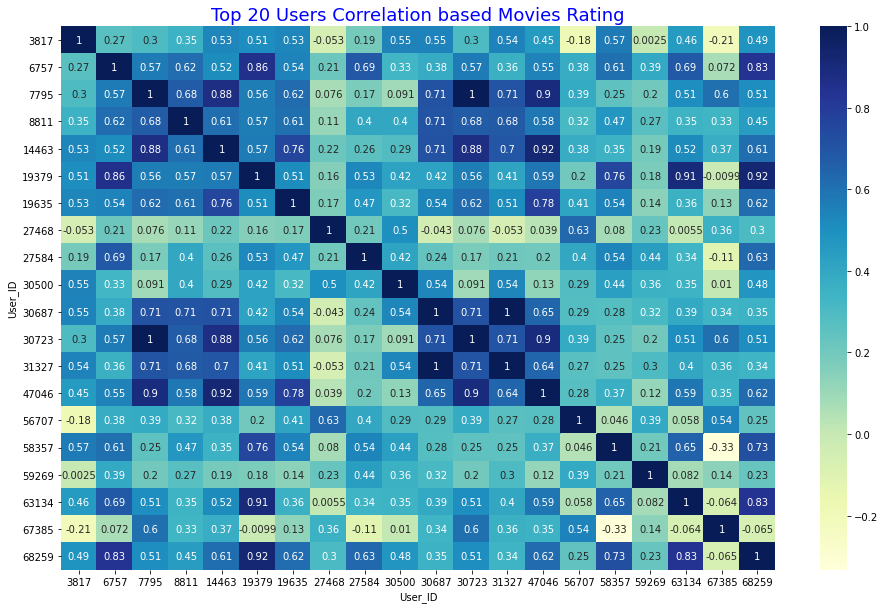

In [103]:
### checking the corraltion of top 20 users in Heatmap
plt.figure(figsize=(16,10))
ax=sns.heatmap(df_ratings_pivot_corr , annot=True , cmap="YlGnBu")
plt.title("Top 20 Users Correlation based Movies Rating" , fontsize=18 , color="blue")
plt.show()

In [107]:
### let manually check few of the highly correlated users
df_ratings_pivot[df_ratings_pivot.index.isin([7795,14463,47046])]

Movie_ID,50,318,527,750,858,904,912,922,1148,1178,1193,1212,1221,1284,2019,3030,3435,6896,44555,58559
User_ID,,,,,,,,,,,,,,,,,,,,
7795,5.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0
14463,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,5.0,4.0,3.0,4.0,3.0,3.0,0.0,0.0,0.0
47046,5.0,4.0,4.0,4.5,5.0,5.0,5.0,5.0,3.5,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0


<br>

<br>